# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Import modules

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [ ]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

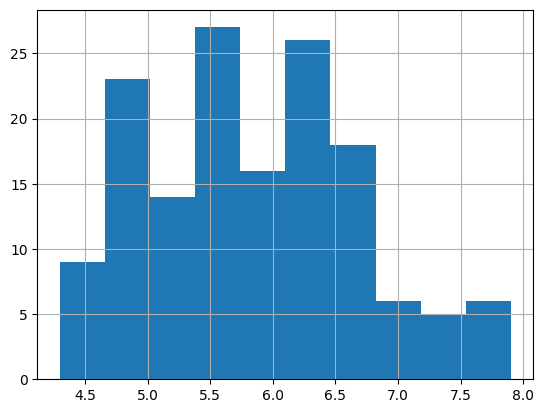

In [ ]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

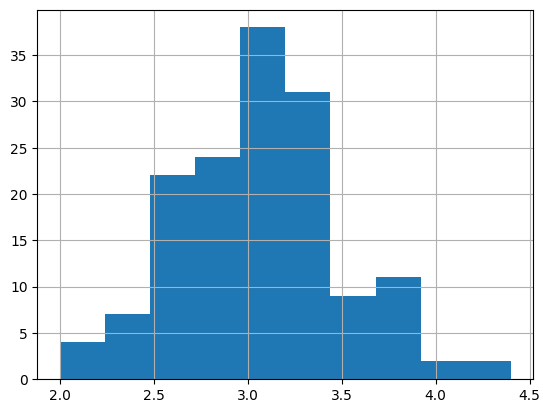

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

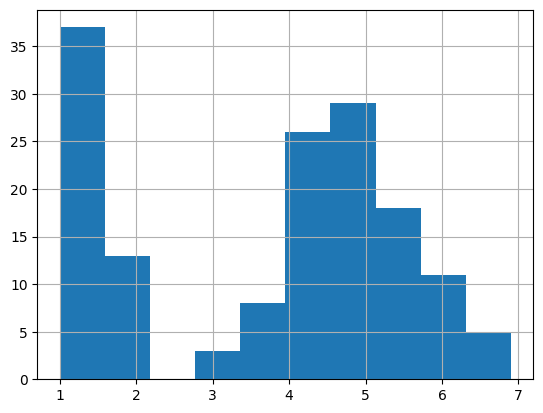

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

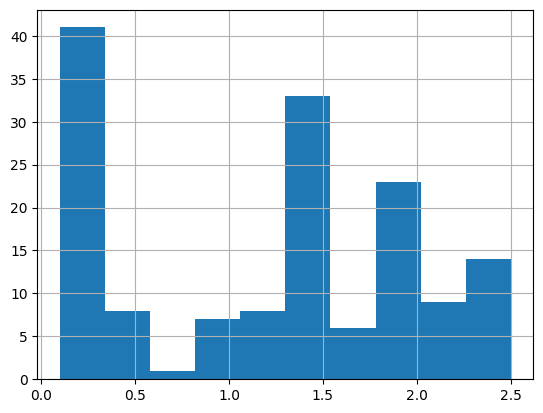

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

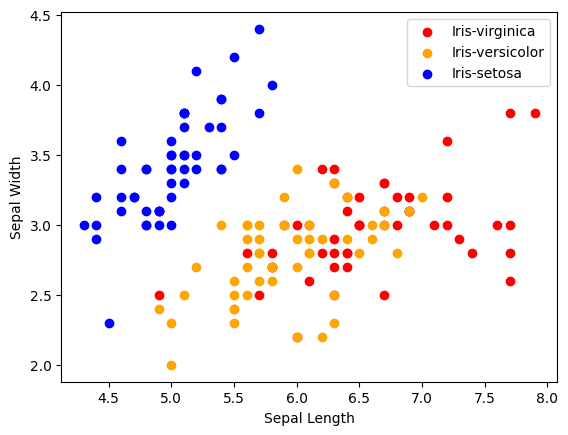

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

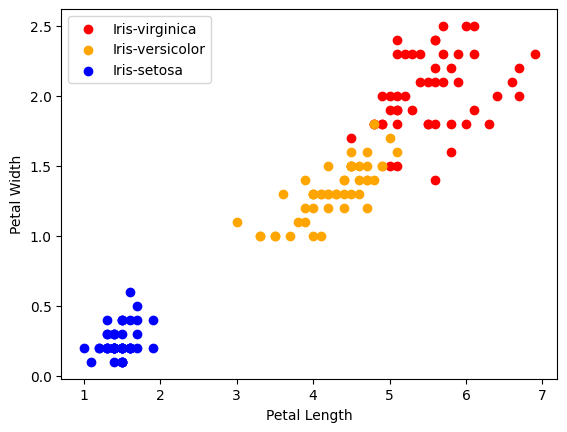

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

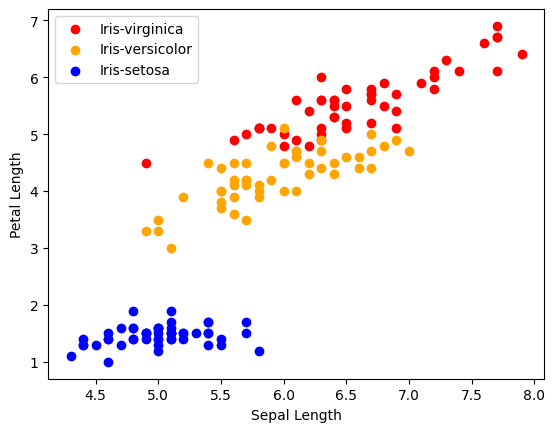

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

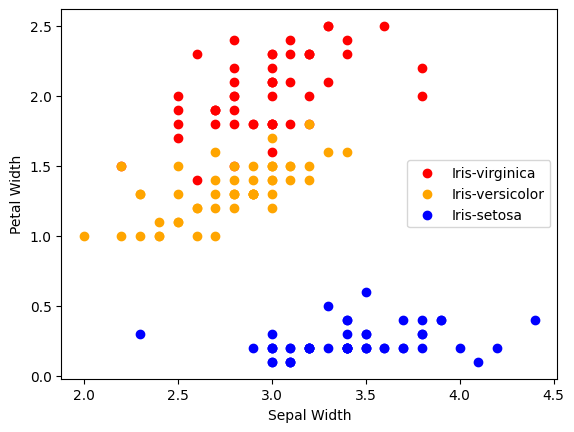

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr = numeric_df.corr()

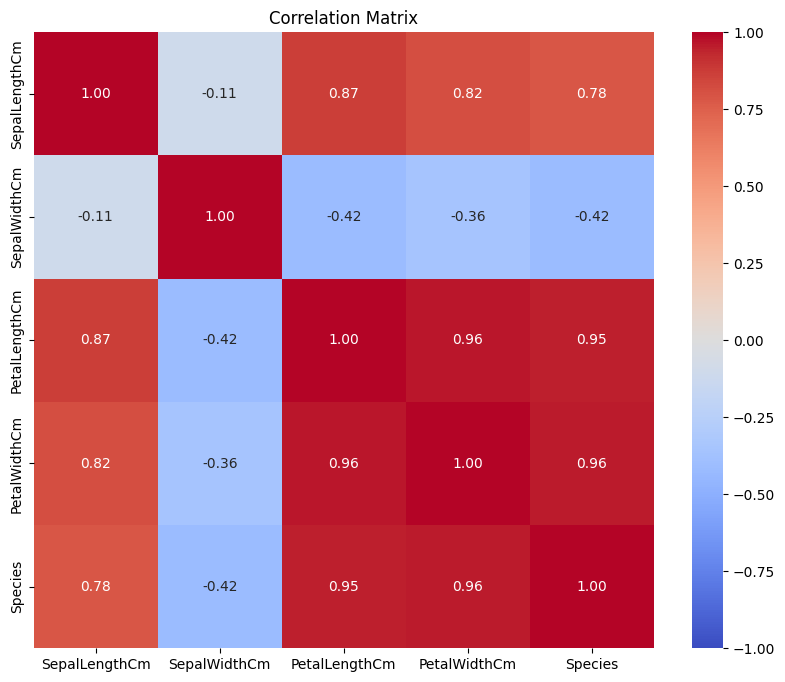

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}


In [ ]:
from sklearn.metrics import accuracy_score
accuracies = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.2f}%")

Accuracy for Decision Tree: 91.11%
Accuracy for K-Nearest Neighbors: 93.33%
Accuracy for Logistic Regression: 95.56%


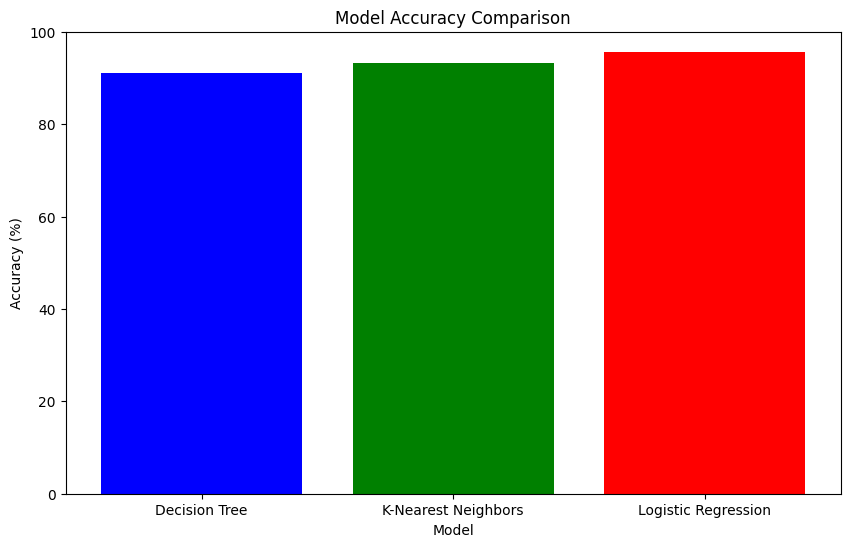

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()